<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de **Informações**<br> 
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# **Tópicos**

<ol type="1">
  <li>Criação da tabela e algumas queries;</li>
  <li>Links utéis;</li>
  <li>Dicas de livros, podcasts e outros;</li>
</ol>

# O PROJETO

A base de dados que será utilizada neste projeto é uma amostra disponibilizada pela professora, do dataset "credito.csv", disponibilizado pelo link https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv.

Esta amostra tem o objetivo de facilitar o processamento dos dados

Explicando variáveis:
<br>
| Coluna                   | Descrição                                               | Tipo     |
| :----------------------- | :-----------------------------------------------------: | -------: |
| **idade**                | Idade do cliente                                        | *int*    | 
| **sexo**                 | Gênero do cliente (M ou F)                              | *string* |
| **dependentes**          | Número de dependentes do cliente                        | *int*    |
| **escolaridade**         | Nível de escolaridade do clientes                       | *string* |
| **estado_civil**         | Estado civil do cliente                                 | *string* |
| **salario_anual**        | Faixa salarial do cliente                               | *string* |
| **tipo_cartao**          | Tipo de cartao do cliente                               | *string* |
| **qtd_produtos**         | Quantidade de produtos comprados nos últimos 12 meses   | *bigint* |
| **iteracoes_12m**        | Quantidade de iterações/transacoes nos ultimos 12 meses | *int*    |
| **meses_inativo_12m**    | Quantidade de meses que o cliente ficou inativo         | *int*    |
| **limite_credito**       | Limite de credito do cliente                            | *float*  |
| **valor_transacoes_12m** | Valor das transações nos ultimos 12 meses               | *float*  |
| **qtd_transacoes_12m**   | Quantidade de transacoes nos ultimos 12 meses           | *int*    |

---

# **1. Criação da tabela**


O arquivo **credito8.csv** será utilizado para criação da tabela utilizando Amazon S3, as queries utilizadas para análise serão feitas através do Amazon Athena, para criação de gráficos irei exportar as queries realizadas da AWS para arquivos csv.

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito ( 
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string, 
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
```


```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito 
where escolaridade != 'na' and tipo_cartao != 'na' 
group by escolaridade, tipo_cartao, sexo 
order by limite_credito desc 
limit 10
```

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo 
from credito 
group by sexo
```

```sql
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual 
from credito 
where salario_anual != 'na' 
group by sexo, salario_anual 
order by avg(valor_transacoes_12m) desc
```

# **2. Análise exploratória dos dados**

Irei executar algumas queries com o objetivo de observar o comportamento dos dados na tabela criada acima, assim como também irei realizar a criação de alguns gráficos

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Query 1:
pequena amostra da tabela

```sql
select * from credito limit 10;
```

In [2]:
query01 = pd.read_csv('query01.csv')
query01

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


### Query 2:
Número de linhas da tabela
```sql
select count(*) from credito
```

In [3]:
query02 = pd.read_csv('query02.csv')
query02

,quantidade_linhas
0,2564


### Query 3:
Tipos de dados de cada coluna da tabela
```sql
DESCRIBE credito;
```

![query03](query03.png)

### Query 4:
Categorias de escolaridade

```sql
SELECT DISTINCT escolaridade FROM credito
```

In [6]:
query04 = pd.read_csv('query04.csv')
query04

,escolaridade
0,na
1,sem educacao formal
2,ensino medio
3,mestrado
4,graduacao
5,doutorado


### Query 5:

Categorias de estado civil

```sql
SELECT DISTINCT estado_civil FROM credito
```

In [7]:
query05 = pd.read_csv('query05.csv')
query05

,estado_civil
0,divorciado
1,na
2,casado
3,solteiro


### Query 6:

```sql
select salario_anual, count(*) as quantidade from credito
group by salario_anual
order by case
		salario_anual
		when 'menos que $40K' then 1
		when '$40K - $60K' then 2
		when '$60K - $80K' then 3
		when '$80K - $120K' then 4
		when '$120K +' then 5 else 6
	end;
```

In [8]:
query06 = pd.read_csv('query06.csv')
query06

,salario_anual,quantidade
0,menos que $40K,701
1,$40K - $60K,467
2,$60K - $80K,451
3,$80K - $120K,488
4,$120K +,222
5,na,235


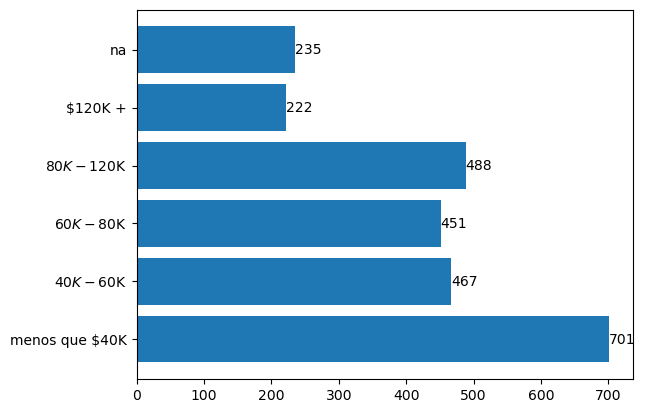

In [21]:
fig, ax = plt.subplots()

rects = ax.barh(y=query06['salario_anual'], width=query06['quantidade'], label=query06['quantidade'] )

ax.bar_label(rects, label_type='edge')

plt.show()


Com o gráfico acima é possível observar que temos como maioria os clientes que recebem um salário anual de menos que $40.000,00. também é possível observar que existem 235 clientes que não tem um valor definido (nulo), devemos analisar se o cliente não possue um salário no momento ou se a informação não foi preenchida como deveria.

### Query 7:
Clientes para cada tipo de cartão
```sql
select tipo_cartao,
	count(*) as quantidade
from credito
group by tipo_cartao
order by quantidade desc;
```

In [22]:
query07 = pd.read_csv('query07.csv')
query07

,tipo_cartao,quantidade
0,blue,2453
1,silver,93
2,gold,16
3,platinum,2


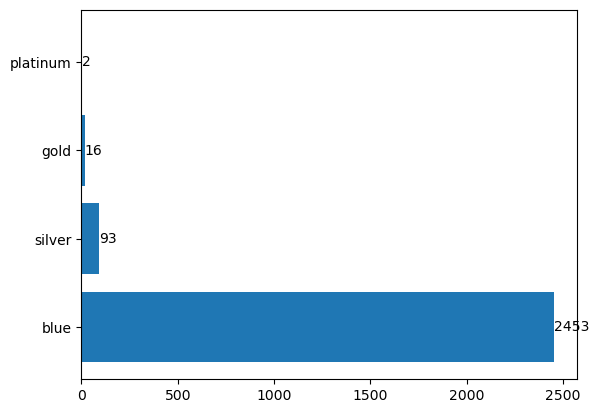

In [25]:
fig, ax = plt.subplots()

rects = ax.barh(y=query07['tipo_cartao'], width=query07['quantidade'], label=query07['quantidade'] )

ax.bar_label(rects, label_type='edge')

plt.show()


No gráfico acima é possível observar que a grande maioria possui o cartão do tipo "blue"

In [32]:
query07['porcentagem'] = query07['quantidade']/sum(query07['quantidade'])
query07['porcentagem'] *= 100

In [34]:
# Porcentagem de cada tipo de cartao
query07[['tipo_cartao','porcentagem']]

,tipo_cartao,porcentagem
0,blue,95.670827
1,silver,3.627145
2,gold,0.624025
3,platinum,0.078003


### Query 8:


```sql
select round(avg(valor_transacoes_12m), 2) as valor_medio_transacoes,
	min(valor_transacoes_12m) as valor_minimo_transacoes,
	max(valor_transacoes_12m) as valor_maximo_transacoes
from credito;
```

In [35]:
query08 = pd.read_csv('query08.csv')
query08

,valor_medio_transacoes,valor_minimo_transacoes,valor_maximo_transacoes
0,1820.33,510.16,4776.58


### Query 9:


```sql
select sexo, count(*) as quantidade from credito group by sexo
```

In [37]:
query09 = pd.read_csv('query09.csv')
query09

,sexo,quantidade
0,M,1563
1,F,1001


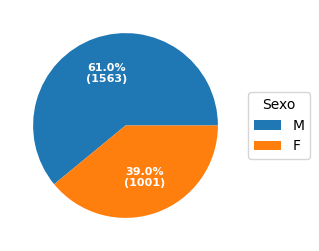

In [44]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = query09['quantidade']
ingredients = query09['sexo']


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


plt.show()

É possível observar que existe um maior número de clientes do gênero masculino(M) do que feminino(F), sendo uma diferença de aproximadamente 500 clientes

### Query 10
Limite máximo de credito por tipo de cartão, gênero e escolaridade

```sql
select count(*) as quantidade,
	max(limite_credito) as limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
from credito
where escolaridade != 'na'
group by sexo,
	escolaridade,
	tipo_cartao
order by limite_credito_maximo desc;
```

In [46]:
query10 = pd.read_csv('query10.csv')
query10

,quantidade,limite_credito_maximo,tipo_cartao,sexo,escolaridade
0,203,34516.99,blue,M,sem educacao formal
1,2,34516.98,gold,M,mestrado
2,462,34516.97,blue,M,mestrado
3,1,34516.96,platinum,F,doutorado
4,7,34516.96,silver,M,sem educacao formal
5,4,34516.95,gold,M,ensino medio
6,1,34516.94,gold,M,graduacao
7,1,34516.94,gold,F,graduacao
8,7,34516.89,silver,M,graduacao
9,330,34516.74,blue,M,ensino medio


### Query 11:
Limite mínimo de credito por tipo de cartão, gênero e escolaridade

```sql
select count(*) as quantidade,
	MIN(limite_credito) as limite_credito_maximo,
	tipo_cartao,
	sexo,
	escolaridade
from credito
where escolaridade != 'na'
group by sexo,
	escolaridade,
	tipo_cartao
order by limite_credito_maximo asc;
```


In [47]:
query11 = pd.read_csv('query11.csv')
query11

,quantidade,limite_credito_minimo,tipo_cartao,sexo,escolaridade
0,91,1438.03,blue,F,graduacao
1,92,1438.04,blue,F,doutorado
2,133,1438.07,blue,M,doutorado
3,316,1438.08,blue,F,mestrado
4,148,1438.12,blue,F,sem educacao formal
5,190,1438.17,blue,F,ensino medio
6,203,1438.18,blue,M,sem educacao formal
7,330,1438.26,blue,M,ensino medio
8,158,1438.43,blue,M,graduacao
9,462,1438.45,blue,M,mestrado


#### Analisando limites máximo e mínimo de cartão a partir do gênero, tipo de cartão e escolaridade

É possível que o limite máximo parece não ser afetado por gênero, escolaridade ou tipo de cartão, porém para o mínimo de limite, parece ser afetado ao tipo de cartão, sendo os menores registros de limite de cartão todos em média em $1438,00 e para cartão do tipo "blue"

### Query 12:
Valores de transação em 12 meses por gênero e estado civil

```sql
select count(*) as quantidade,
	sexo,
	estado_civil,
	min(valor_transacoes_12m) as valor_minimo_transacoes,
	max(valor_transacoes_12m) as valor_maximo_transacoes,
	avg(valor_transacoes_12m) as valor_medio_transacoes
from credito
where estado_civil != 'na'
group by sexo,
	estado_civil
order by quantidade asc;
```

In [48]:
query12 = pd.read_csv('query12.csv')
query12

,quantidade,sexo,estado_civil,valor_minimo_transacoes,valor_maximo_transacoes,valor_medio_transacoes
0,69,F,divorciado,1039.44,4370.80,2024.6688
1,92,M,divorciado,781.27,4605.89,1959.7296
2,308,F,solteiro,777.75,4776.58,2035.2687
3,458,M,solteiro,530.36,4686.93,1978.7189
4,591,F,casado,510.16,4740.94,1707.7339
5,930,M,casado,563.93,4542.69,1723.0211


É possível observar que a quantidade de transações tem relação com o estado civil do cliente, onde os clientes casados aparentam efetuar uma maior quantidade de transações enquanto clientes divorciados apresentam um número menor de transações.
<br>
<br>
Já a média dos valores das transações é maior para clientes divorciados enquanto ela diminue para clientes casados. Em relação ao gênero, os valores de transações parecem ter valores semelhantes na maior parte dos casos, tendo uma diferença maior no valor mínimo de transação para clientes divorciados
<br>
<br>
Também podemos notar uma maior quantidade de transações para clientes do gênero masculino em todos os estado civil.

# **3. Conclusão**

Análises extraidas do conjunto de dados:

- A maior parte dos clientes possui salário abaixo de $40.000, tendo em sua maior parte o cartão tipo "blue" e consequentemente limite de crédito mais baixo em relação aos outros tipos de cartão. O que pode ser uma oportunidade de focar neste publico com uma campanha de marketing ou algum tipo de estratégia para impactar esta parcela dos clientes que representa a maior parte desses clientes.

- É possível verificar que as transações realizadas com cartão são feitas em sua maioria por clientes casados, ao mesmo tempo, o valor médio das transações de clientes divorciados é maior, porém isso pode ser explicado pelo menor número de transações desses clientes.

- Ao analisar os clientes por estado civil e gênero, em todos os casos, os clientes do gênero masculino tem realizaram mais transações do que os clientes do gênero feminimo, porém também é necessário ressaltar que a base de dados não está equilibrada, tendo cerca de 500 clientes a mais do gênero masculino, o que pode estar causando esta discrepância

- Os menores limites de cartão foram encontrados em clientes com cartão tipo "blue", porém é possível observar um aumento do limite quanto maior a faixa salarial do cliente, o que pode auxiliar na criação de ofertas para cada perfil de cliente.

Podemos concluir a partir das análises extraídas acima que para atingir uma parcela maior dos clientes, uma campanha de marketing para clientes que realizam mais transações (estado civil casado), que possuem cartão de tipo "blue" e um salário anual abaixo de $40.000,00. Desta forma estaremos focando nos clientes com maior potencial de engajamento, assim utilizando recursos de forma mais eficiente, buscando a aquisição de novos clientes com perfis semelhantes e a retenção dos clientes atuais.